<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r6_i1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-15-m-1-r6.csv?token=AKVFSOGWII4PQBWODYO56AC63I2IK')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-normal-n-0-15-r6.csv?token=AKVFSOB5PQW5BFUJQL6FMNK63I2I6')


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,80,4,2,4,1,1,5,17,23,7,1,1,2,3,1,0.333333,8,77,1,77,77,8,8,20,340,0
1,80,4,2,4,1,1,5,17,23,7,0,0,1,4,1,0.250000,8,46,1,46,46,8,4,20,340,1
2,81,4,2,4,2,2,5,17,23,7,0,0,1,4,1,0.250000,9,45,2,46,90,8,16,20,340,1
3,81,4,2,4,2,2,5,17,23,7,1,1,2,3,1,0.333333,9,76,2,77,152,8,32,20,340,0
4,82,4,2,4,3,2,5,17,23,7,0,0,1,4,1,0.250000,10,44,3,46,132,8,24,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92513,3276717,2,0,6,4,2,3,10,22,6,23,7,30093,1,0,0.000000,25,5,27,31,135,0,1444464,18,180,0
92514,3276724,2,0,6,5,3,3,10,22,6,23,7,30093,1,0,0.000000,32,4,28,31,112,0,2708370,18,180,0
92515,3276725,2,0,2,1,4,3,11,22,6,23,7,30094,1,0,0.000000,32,3,29,31,87,0,240752,6,66,0
92516,3276726,2,0,7,1,4,3,12,22,6,15,15,30093,3,0,0.000000,6,2,30,31,60,0,842604,21,252,0


In [6]:
df.shape

(92518, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-15-m-11-r6.csv?token=AKVFSODRMP7WFOTNGA43XEC63I2IO')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-15-m-12-r6.csv?token=AKVFSOGFXPLRBVFF2CSTSU263I2RE')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-15-m-7-r6.csv?token=AKVFSOCFZYWDIHTDXDL47DC63I2RG')


In [8]:
print(df13.shape)
print(df14.shape)
print(df15.shape)

(56593, 26)
(53634, 26)
(74541, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.216069,-0.062455,0.002811,-0.004235,0.499533,0.502670,-0.014218,0.095263,-0.507719,-0.613443,-0.499293,-0.009767,0.079104,0.051817,0.040736,0.579775,-0.043577,0.340893,0.492871,-0.024395
inport,-0.216069,1.000000,-0.090843,0.018827,-0.028370,0.158666,0.095364,-0.046889,0.478876,0.413673,0.345061,0.044437,-0.049924,-0.140873,-0.142585,-0.116554,0.635645,-0.040381,0.049348,0.093338,0.025526
cache_coherence_type,-0.062455,-0.090843,1.000000,0.291952,-0.439933,-0.235148,-0.239417,0.050719,-0.217981,-0.171485,-0.129688,-0.117685,0.061186,-0.009361,0.038730,0.022937,-0.141206,0.318863,0.645050,0.124976,-0.001207
flit_id,0.002811,0.018827,0.291952,1.000000,-0.031203,0.219185,0.197822,0.006309,0.106991,0.039671,-0.043457,0.367590,-0.036584,0.033703,-0.002153,-0.001140,0.011362,0.637618,0.414617,0.317895,0.002168
flit_type,-0.004235,-0.028370,-0.439933,-0.031203,1.000000,-0.330282,-0.298091,-0.009506,-0.161221,-0.059778,0.065484,0.314856,-0.047896,0.054513,0.004945,0.003334,-0.017121,0.111063,-0.624772,-0.479024,-0.003268
vnet,0.499533,0.158666,-0.235148,0.219185,-0.330282,1.000000,0.986235,-0.057648,0.567428,-0.152551,-0.411575,-0.474277,-0.076629,0.014027,-0.046784,-0.029845,0.521901,-0.060899,0.591031,0.930636,0.021083
vc,0.502670,0.095364,-0.239417,0.197822,-0.298091,0.986235,1.000000,-0.053907,0.520157,-0.220187,-0.484701,-0.467573,-0.076373,0.028832,-0.035529,-0.019487,0.473362,-0.065606,0.576666,0.929938,0.020894
traversal_id,-0.014218,-0.046889,0.050719,0.006309,-0.009506,-0.057648,-0.053907,1.000000,-0.090987,-0.039111,0.009696,0.036906,0.059518,0.060442,0.089648,0.013357,-0.053694,0.555727,-0.003229,-0.039412,-0.303770
hop_count,0.095263,0.478876,-0.217981,0.106991,-0.161221,0.567428,0.520157,-0.090987,1.000000,0.568402,0.085196,-0.084462,-0.147361,-0.122497,-0.201669,-0.166192,0.426986,-0.098819,0.265196,0.476644,0.109691
current_hop,-0.507719,0.413673,-0.171485,0.039671,-0.059778,-0.152551,-0.220187,-0.039111,0.568402,1.000000,0.803399,0.463150,-0.038854,-0.148698,-0.140160,-0.119921,-0.078413,-0.044515,-0.262251,-0.257435,0.074126


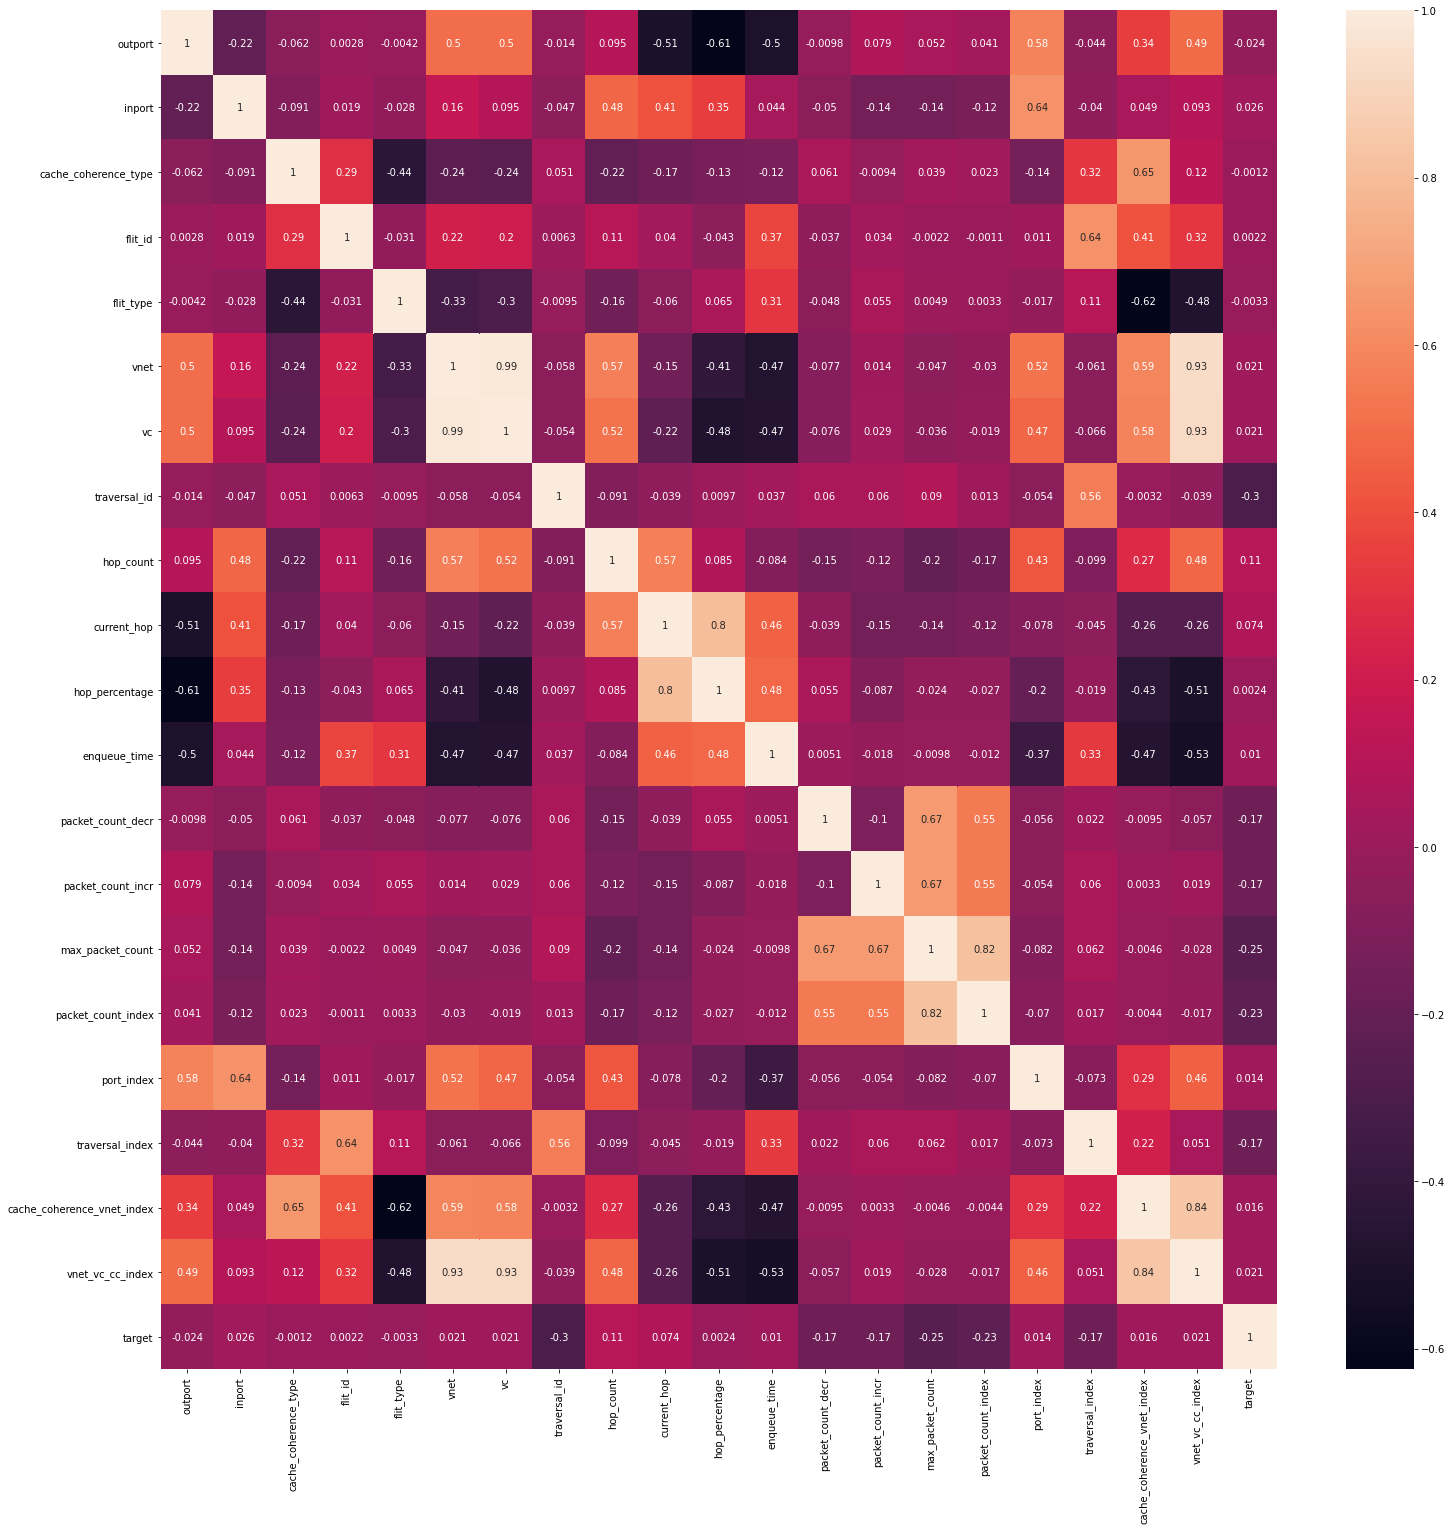

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

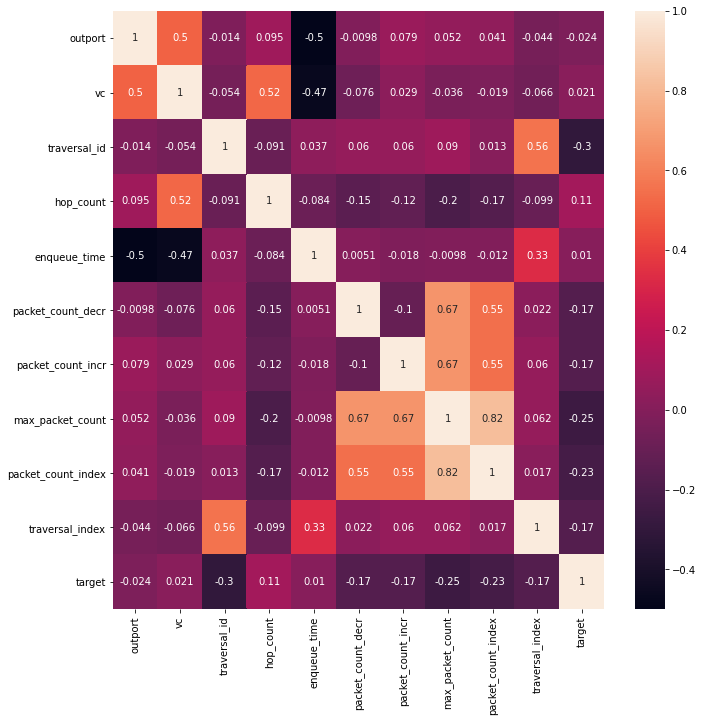

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

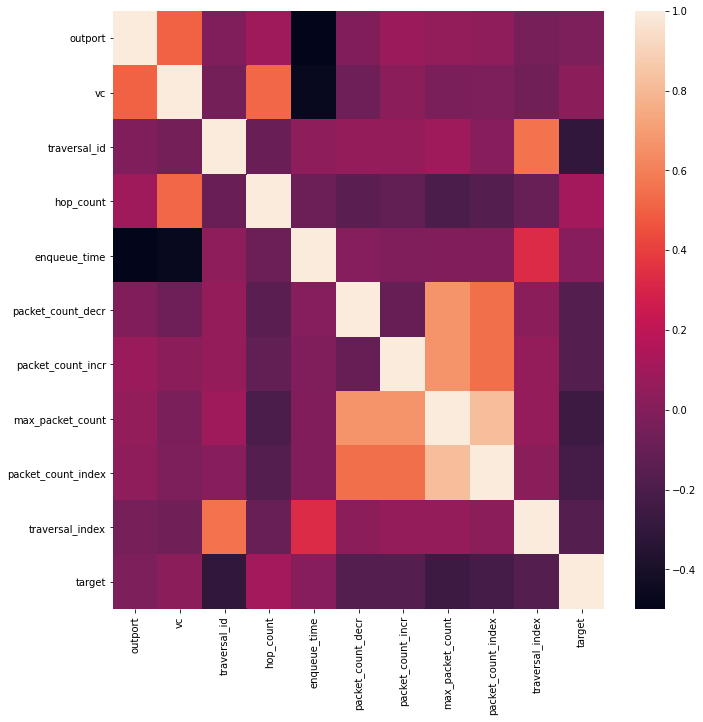

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.0,0.888889,0.000033,0.50,0.062500,0.487179,0.000000,0.487179,0.012179,0.000001
1,1.0,0.888889,0.000000,0.75,0.062500,0.288462,0.000000,0.288462,0.007212,0.000000
2,1.0,0.888889,0.000000,0.75,0.078125,0.282051,0.006410,0.288462,0.014263,0.000004
3,1.0,0.888889,0.000033,0.50,0.078125,0.480769,0.006410,0.487179,0.024199,0.000010
4,1.0,0.888889,0.000000,0.75,0.093750,0.275641,0.012821,0.288462,0.020994,0.000007
...,...,...,...,...,...,...,...,...,...,...
92513,0.5,0.111111,0.999967,0.00,0.328125,0.025641,0.166667,0.192308,0.021474,0.533333
92514,0.5,0.111111,0.999967,0.00,0.437500,0.019231,0.173077,0.192308,0.017788,1.000000
92515,0.5,0.222222,1.000000,0.00,0.437500,0.012821,0.179487,0.192308,0.013782,0.088890
92516,0.5,0.333333,0.999967,0.50,0.031250,0.006410,0.185897,0.192308,0.009455,0.311110


In [20]:
train_X[train_X.duplicated()].shape

(9, 10)

In [21]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.0,0.888889,0.000000,0.75,0.062500,0.476190,0.000000,0.476190,0.014652,0.000000
1,1.0,0.888889,0.000000,0.75,0.078125,0.468254,0.007937,0.476190,0.029060,0.000004
2,1.0,0.888889,0.000000,0.75,0.093750,0.460317,0.015873,0.476190,0.042979,0.000007
3,1.0,0.888889,0.000000,0.75,0.109375,0.452381,0.023810,0.476190,0.056410,0.000010
4,1.0,0.888889,0.000000,0.75,0.171875,0.444444,0.031746,0.476190,0.069353,0.000021
...,...,...,...,...,...,...,...,...,...,...
56588,0.5,0.111111,0.999967,0.00,0.328125,0.031746,0.134921,0.166667,0.021734,0.533333
56589,0.5,0.111111,0.999967,0.00,0.437500,0.023810,0.142857,0.166667,0.018315,1.000000
56590,0.5,0.222222,1.000000,0.00,0.437500,0.015873,0.150794,0.166667,0.014408,0.088890
56591,0.5,0.333333,0.999967,0.50,0.031250,0.007937,0.158730,0.166667,0.010012,0.311110


In [22]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [25]:
train_Y = df['target']
train_Y.value_counts()

0    55271
1    37247
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs       Score
2        traversal_id  968.798452
7    max_packet_count  416.838924
8  packet_count_index  381.768308
9     traversal_index  304.697615
6   packet_count_incr  210.131364
5   packet_count_decr  206.715102
3           hop_count  116.512249
1                  vc   12.460855
0             outport    5.349586
4        enqueue_time    0.527888


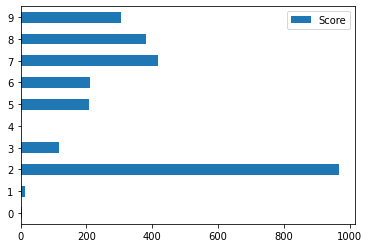

In [28]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [33]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.96408924451902
Test Prediction Score 96.38072778487438


In [34]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 78.27116427826763
Test Prediction Score 78.46701719058807
Test Prediction Score 83.4225459814062


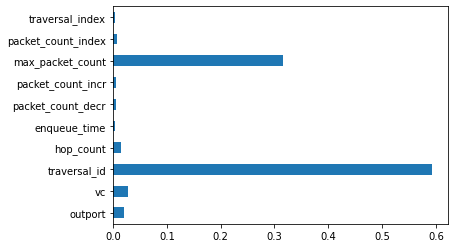

In [35]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

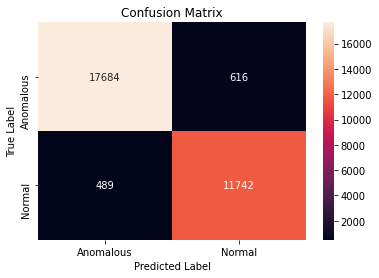

In [36]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [37]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18300
           1       0.95      0.96      0.96     12231

    accuracy                           0.96     30531
   macro avg       0.96      0.96      0.96     30531
weighted avg       0.96      0.96      0.96     30531



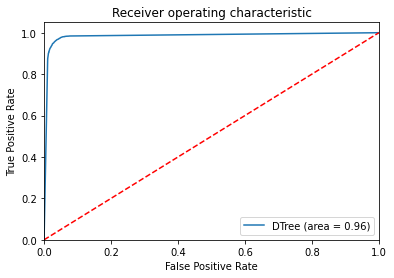

In [38]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [40]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r6l-i1.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [43]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99516027554165
Test Prediction Score 99.35802954374242


In [44]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 79.94628310921846
Test Prediction Score 80.80695081478166
Test Prediction Score 84.46760843025986


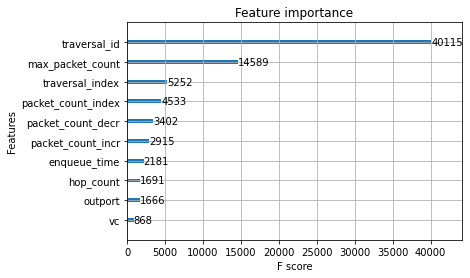

In [45]:
plot_importance(xgbc)
plt.show()

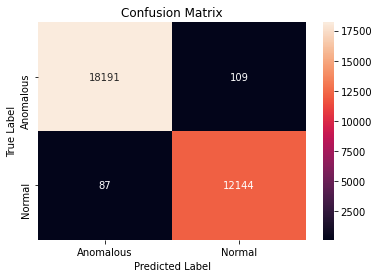

In [46]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18300
           1       0.99      0.99      0.99     12231

    accuracy                           0.99     30531
   macro avg       0.99      0.99      0.99     30531
weighted avg       0.99      0.99      0.99     30531



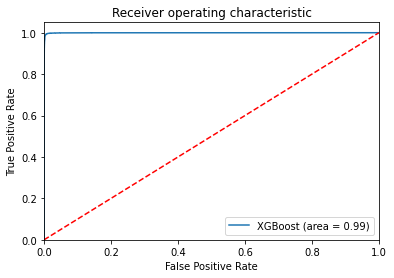

In [48]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()